## Definition of the Problem 
The main target of this data is to model the Customer Intelligence in the Bank. Banks in general needs to analyse the banks client intelligence (behaviour) and the estimation of clients behaviour  with inclusion of the external factors could be very useful for the Bank management to predict if the client is active or non-active. If the client is non-active there is an indication to take pro-active action to the client to keep him as a stable Bank client for the future and do not let him switch the bank. 
The Customer intelligence is described by 36 dimensional data (6 are nominal and 30 are real). The associations of the data with particular customer as well as the real meaning of each of presented 36 features are matter of confidentiality and will not be revealed. 
The Bank is providing 24 000 representation data for a competition. 12 000 are marked as "Active" and 12 000 are marked as "non-active" clients. 

## The goal 
To create the classification tools for distinguishing the "active" and "non-active" classes - dichotomise classification. 

## Description of training and testing files 
client_train.txt	- the file consists of 12 000 training patterns. Each pattern has 37 values (**36 are input attributes**, 37th is output class), **first 6 represent values of nominal attributes** following 30 represent values of real attributes and the last value represents information about class. 

client_test.txt	- the file consists of 12 000 testing patterns. Each pattern has the same structure as patterns in client_train.txt file without information about class. 


### 1. Perform a exploratory data analysis and discuss what you have learned from this analysis.

Loading the data:

In [1]:
options(warn = FALSE)
train_data <- try(read.table("Input/client_train.txt"))
if (class(train_data) == "try-error") {
    folder = "Input/"
    file = "client_train.txt"
    cat("Downloading the data instead.")
    dir.create(folder)
    train_data <- read.table("http://web.tecnico.ulisboa.pt/~ist13493/MEDM2020/Project1/Group3Data/client_train.txt")
    write.table(train_data, file=paste(folder, file, sep=''), append = FALSE, sep = " ", dec = ".",
            row.names = FALSE, col.names = FALSE)
    }
test_data <- try(read.table("Input/client_test_marked.txt"))
if (class(train_data) == "try-error") {
    file = "client_test_marked.txt"
    print("Downloading the data instead.")
    train_data <- read.table("http://web.tecnico.ulisboa.pt/~ist13493/MEDM2020/Project1/Group3Data/client_test_marked.txt")
    write.table(train_data, file=paste(folder, file, sep=''), append = FALSE, sep = " ", dec = ".",
            row.names = FALSE, col.names = FALSE)
    }
options(warn = TRUE)

Loading the required packages:

In [6]:
library(ggplot2)
library(e1071)
library(DataExplorer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'DataExplorer' was built under R version 3.6.3"

We begin by checking the data:

In [3]:
head(train_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
_1_,_7_,_55_,_19_,_65_,_29_,0.02985075,0.02777778,0,0,...,0.1034028,0.9723497,0.9822638,0.09506990,0.005826148,0.1739197,0.004706096,0.8776010,0.9215270,_1_
_1_,_7_,_55_,_19_,_65_,_29_,0.01492537,0.00000000,0,0,...,0.1034028,0.9723635,0.9822739,0.09477557,0.005826085,0.1740724,0.004706074,0.8776039,0.9215295,_0_
_0_,_7_,_53_,_11_,_65_,_29_,0.04477612,0.00000000,0,0,...,0.1034028,0.9723653,0.9822743,0.09492274,0.005826095,0.1742251,0.004706072,0.8776012,0.9215270,_1_
_1_,_7_,_55_,_19_,_65_,_29_,0.01492537,0.00000000,0,0,...,0.1034028,0.9723653,0.9822745,0.09492274,0.005826095,0.1742251,0.004706072,0.8776012,0.9215271,_0_
_1_,_7_,_55_,_19_,_65_,_29_,0.01492537,0.02777778,0,0,...,0.1034028,0.9723650,0.9822723,0.09448124,0.005826073,0.1742251,0.004706070,0.8776001,0.9215251,_0_
_1_,_7_,_55_,_19_,_65_,_29_,0.01492537,0.00000000,0,0,...,0.1034028,0.9723653,0.9822586,0.09492274,0.005826095,0.1742251,0.004706081,0.8775901,0.9215172,_0_


We present a summary of descriptive statistics for the numeric variables:

In [4]:
v <-sapply(train_data[7:36], var)
m <-sapply(train_data[7:36], mean)
q <-sapply(train_data[7:36], quantile)
i <-sapply(train_data[7:36], IQR)
s <-sapply(train_data[7:36], skewness)
k <-sapply(train_data[7:36], kurtosis)
mx <-sapply(train_data[7:36], max)
mn <-sapply(train_data[7:36], min)

descriptive <- data.frame("mean" = m, "variance" = v, "minimum" = mn, "Q1" = q[2,], "median" = q[2,], 
                          "Q3" = q[3,], "max" = mx, "IQR" = i, "skewness" = s, "kurtosis" = k)

show = TRUE
if(show){
    descriptive
} else {
    folder = "Output/"
    file = "descriptive.csv"
    suppressWarnings(dir.create(folder))
    write.csv(descriptive, file = paste(path, file, sep = ''))
}

,mean,variance,minimum,Q1,median,Q3,max,IQR,skewness,kurtosis
V7,1.775995e-02,8.224826e-05,0.000000e+00,1.492537e-02,1.492537e-02,1.492537e-02,4.477612e-01,0.000000e+00,11.358563,431.91933
V8,1.288889e-02,3.232296e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.166667e-01,2.777778e-02,3.098297,44.84325
V9,1.576389e-03,3.349272e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,31.361380,1442.92481
V10,1.494167e-02,2.182762e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01,0.000000e+00,4.459232,28.86227
V11,6.150782e-04,1.371677e-04,0.000000e+00,0.000000e+00,0.000000e+00,2.388340e-04,1.000000e+00,2.388340e-04,63.065141,4786.16320
V12,2.250735e-08,5.404185e-13,0.000000e+00,0.000000e+00,0.000000e+00,3.496360e-10,6.479750e-05,5.637890e-09,74.107668,5966.40552
V13,8.630355e-04,1.196448e-04,0.000000e+00,0.000000e+00,0.000000e+00,1.592610e-04,1.000000e+00,6.370440e-04,70.871752,5999.05907
V14,2.224286e-08,5.277931e-13,0.000000e+00,0.000000e+00,0.000000e+00,1.048910e-09,6.479150e-05,7.080140e-09,76.482340,6250.36146
V15,9.950000e-05,8.646697e-05,0.000000e+00,2.121870e-34,2.121870e-34,2.121890e-34,1.000000e+00,2.200000e-38,104.368456,11154.29995
V16,8.025676e-36,5.791844e-73,3.542810e-36,7.987540e-36,7.987540e-36,7.990500e-36,8.630350e-35,1.764250e-38,92.510420,9370.11152


We can observe that...


Next we analyse the correlation of the numeric values and also the label:

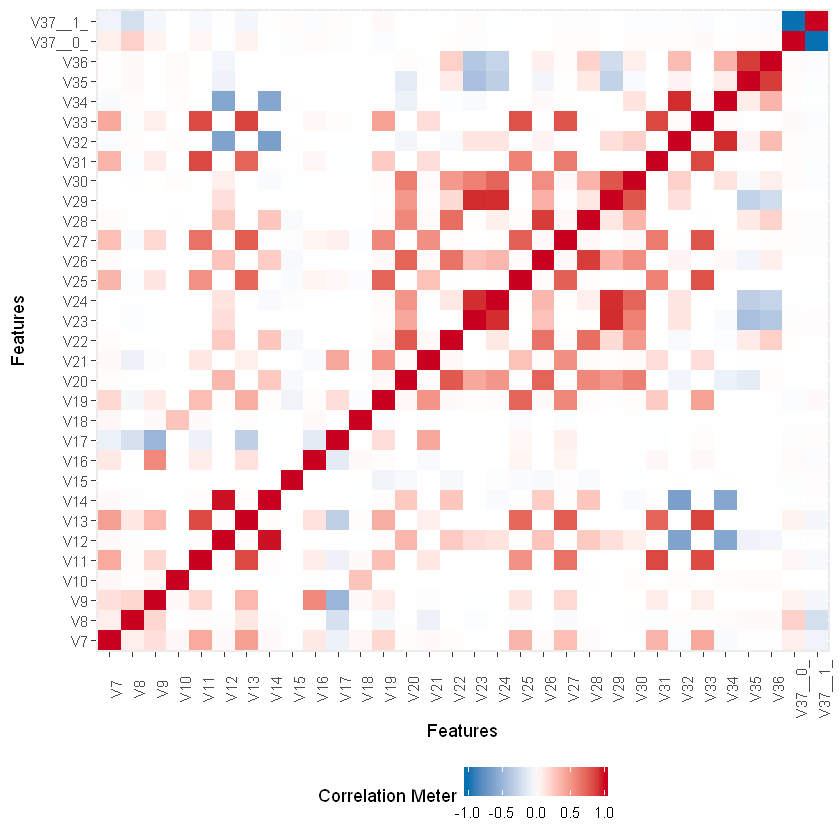

In [8]:
plot_correlation(train_data[, 7:37])

In [6]:
#qplot(log(log(train_data$V12+1)), log(log(train_data$V14+1)), colour = train_data$V37)

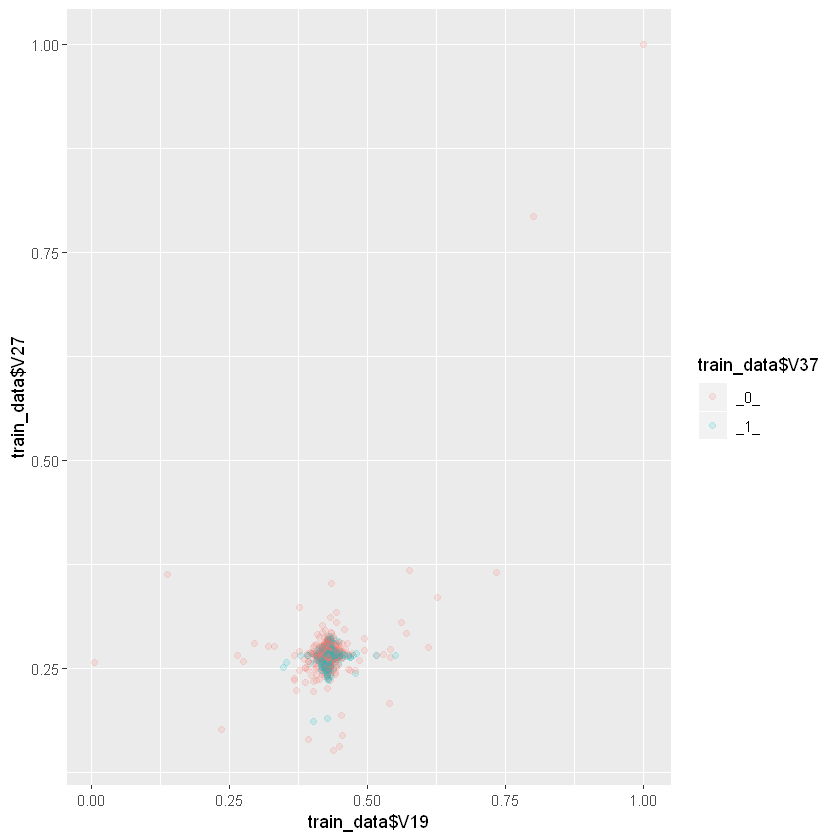

In [7]:
sp <- ggplot(train_data, aes(train_data$V19, train_data$V27, colour = train_data$V37))
sp + geom_point(alpha=.15)

In [37]:
interesting <- (train_data$V11)^2 + (train_data$V13)^2

In [9]:
#addmargins(table(train_data$V3, train_data$V37))

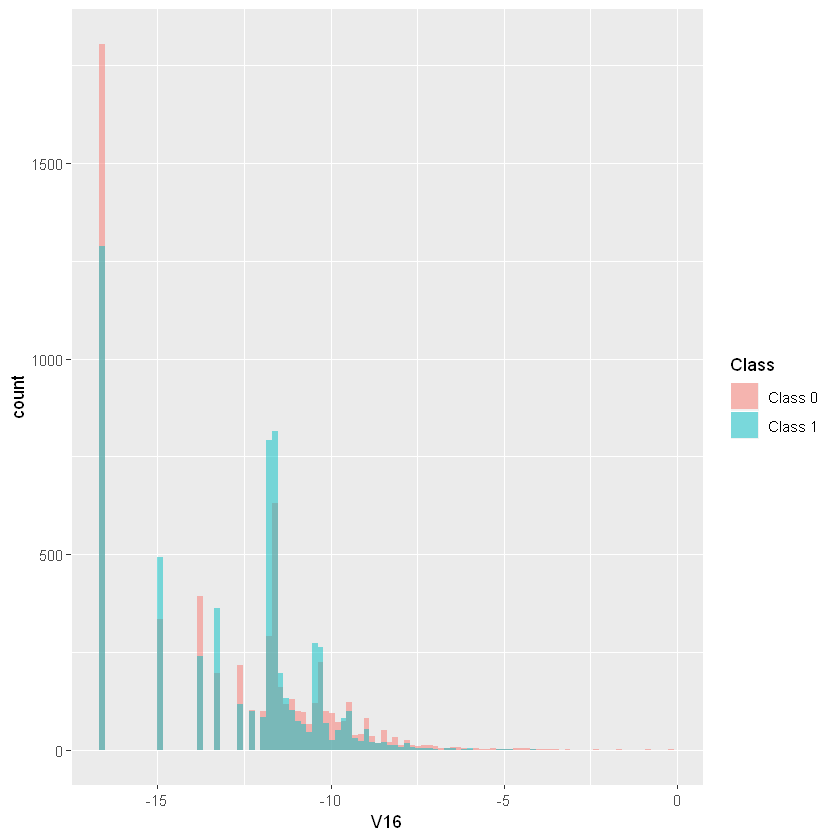

In [8]:
new <- log((train_data$V19-mean(train_data$V19))^2 + (train_data$V27-mean(train_data$V27))^2)

class1 <- data.frame(V16 = new[(train_data[37]=='_1_')])
class0 <- data.frame(V16 = new[(train_data[37]=='_0_')])

class1$Class <- 'Class 1'
class0$Class <- 'Class 0'

classCounts <- rbind(class1, class0)

ggplot(classCounts, aes(V16, fill = Class)) + 
   geom_histogram(alpha = 0.5, aes(y = ..count..), position = 'identity', bins = 100)

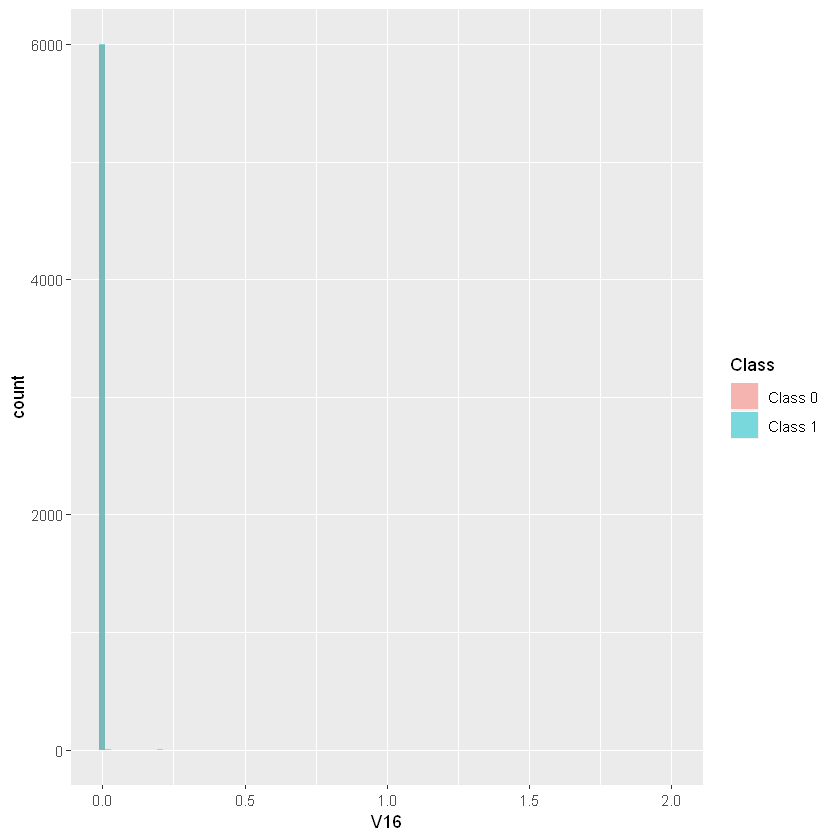

In [10]:
interesting <- (train_data$V11)^2 + (train_data$V13)^2

class1 <- data.frame(V16 = interesting[(train_data[37]=='_1_')])
class0 <- data.frame(V16 = interesting[(train_data[37]=='_0_')])

class1$Class <- 'Class 1'
class0$Class <- 'Class 0'

classCounts <- rbind(class1, class0)

ggplot(classCounts, aes(V16, fill = Class)) + 
   geom_histogram(alpha = 0.5, aes(y = ..count..), position = 'identity', bins = 100)